# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split

# TODO: Fill this in based on where you saved the training and testing data

training_file = "data/train.p"
testing_file  = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test,  y_test  = test['features'],  test['labels']

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

print("The data has been loaded.")

The data has been loaded.


## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

#### 1. Provide a basic summary of the data set and identify where in your code the summary was done. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

This is implemented in the next cell. I used the shapes of the lists that are loaded with the training a test sets, and for the image shape, I used the dimensions of the test list, that indicates on the last 3 index the image shape.

To analyze the number of samples per class in the test dataset vs the train dataset, in the cell after the next one. For this, I used pyplot to create a graph with this information. Also, I used pyplot to create a visualization of random samples in the dataset.

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_test.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
reader        = pd.read_csv('signnames.csv')
classes_names = reader['SignName'].values
n_classes     = len(classes_names)

print("Number of training examples =", n_train)
print("Number of testing examples  =", n_test)
print("Image data shape            =", image_shape)
print("Number of classes           =", n_classes)

Number of training examples = 27839
Number of testing examples  = 12630
Image data shape            = (32, 32, 3)
Number of classes           = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

#### 2. Include an exploratory visualization of the dataset and identify where the code is in your code file.

This is implemented in the next cell.

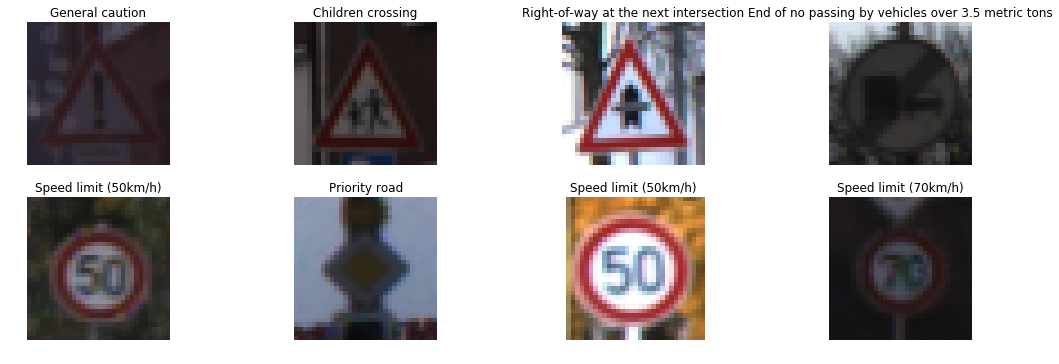

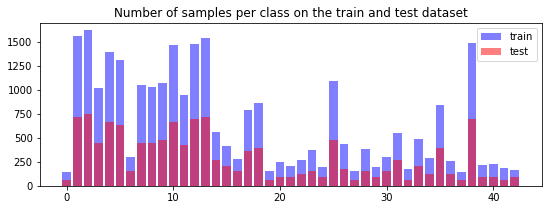

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy             as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 5))
axes = axes.ravel()
fig.tight_layout()

for i in range(8):
    index = random.randint(0, len(X_train))
    axes[i].imshow(X_train[index])
    axes[i].set_title(classes_names[y_train[index]])
    axes[i].axis('off')

train_classes = np.bincount(y_train)
test_classes  = np.bincount(y_test)

plt.figure(figsize=(9, 3))
plt.bar(range(n_classes), train_classes, label="train", color="b", alpha=0.5)
plt.bar(range(n_classes), test_classes,  label="test",  color="r", alpha=0.5)
plt.legend(loc="best")
plt.title("Number of samples per class on the train and test dataset")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### 1. Describe how, and identify where in your code, you preprocessed the image data. What tecniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc.

The next cell describes the functions I used to preprocess the image data, and also to augment the data set.

* **dummy_transformation:** This function represents an image transformation that does nothing, returns the same image.
* **gaussian_blur:** This function applies a gaussian blur to the image.
* **blur:** applies a blur effect to the image.
* **random_rotation:** applies a random rotation given a range of angles to the image.
* **random_translation:** applies a random translation to the image.
* **transform_image:** randomly applies one of the previously described transformation to a given image.
* **normalize_image_dataset:** Normalizes the pixel values of an image to the range 0 to 1.
* **generate_batch:** Generates a batch images, using a given dataset and its labels. With this, augments every batch using random transformation to every image of the batch. Yields the result of generating each batch.

I decided to keep the images on color, so I can capture more features, and make the classifier to yield better results with the random testing data. I normalize the image data to a range of 0 to 1, by dividing it by 255.

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow as tf
import cv2
from sklearn.utils import shuffle

def dummy_transformation(image_data):
    return image_data

def gaussian_blur(image_data):
    return cv2.GaussianBlur(image_data, (3,3), 0)

def blur(image_data):
    return cv2.blur(image_data, (2,2))

def random_rotation(image_data, base_angle = 0.15):
    angle   = np.random.uniform(-base_angle, base_angle)
    image_w = image_data.shape[0]
    image_h = image_data.shape[1]
    matrix  = cv2.getRotationMatrix2D((image_h / 2, image_w / 2), angle, 1)
    return cv2.warpAffine(image_data, matrix, (image_h, image_w))
    
def random_translation(image_data, x_max_trans = 0.1, y_max_trans = 0.1):
    image_w = image_data.shape[0]
    image_h = image_data.shape[1]
    tr_x    = np.random.uniform(-x_max_trans, x_max_trans) * x_max_trans
    tr_y    = np.random.uniform(-y_max_trans, y_max_trans) * y_max_trans
    matrix  = np.float32([[1, 0, tr_x], [0, 1, tr_y]])
    return cv2.warpAffine(image_data, matrix, (image_h, image_w))

def transform_image(image_data):
    #smoothing_choices = [ dummy_transformation, gaussian_blur, blur, dummy_transformation ]
    distortion_choices = [ random_rotation, random_translation, dummy_transformation ]
    #distorted_image   = random_translation(image_data)
    #distorted_image   = random_rotation(image_data)
    distorted_image   = random.choice(distortion_choices)(image_data)
    return distorted_image

def normalize_image_dataset(data):
    #data = (data - np.mean(data)) / np.std(data)  
    return data / 255

def generate_batch(x_set, y_set, num_samples, batch_size):
    n_samples    = x_set.shape[0]
    x_pool       = []
    y_pool       = []
    image_offset = 0
    
    while True:
        image_offset = image_offset % n_samples
        img, label   = x_set[image_offset], y_set[image_offset]
        
        x_pool.append(img)
        y_pool.append(label)
        
        if (num_samples > 0):
            for _ in range(num_samples):
                x_pool.append(transform_image(img))
                y_pool.append(label)
            
        if len(x_pool) >= batch_size:
            x_batch = normalize_image_dataset(np.array(x_pool[:batch_size]))
            y_batch = np.array(y_pool[:batch_size])
            x_pool  = x_pool[batch_size:]
            y_pool  = y_pool[batch_size:]
            yield shuffle(x_batch, y_batch)
            
        image_offset += 1

input_depth      = X_train.shape[3]
X_train, y_train = shuffle(X_train, y_train)

This is are sample images of the transformations described before:

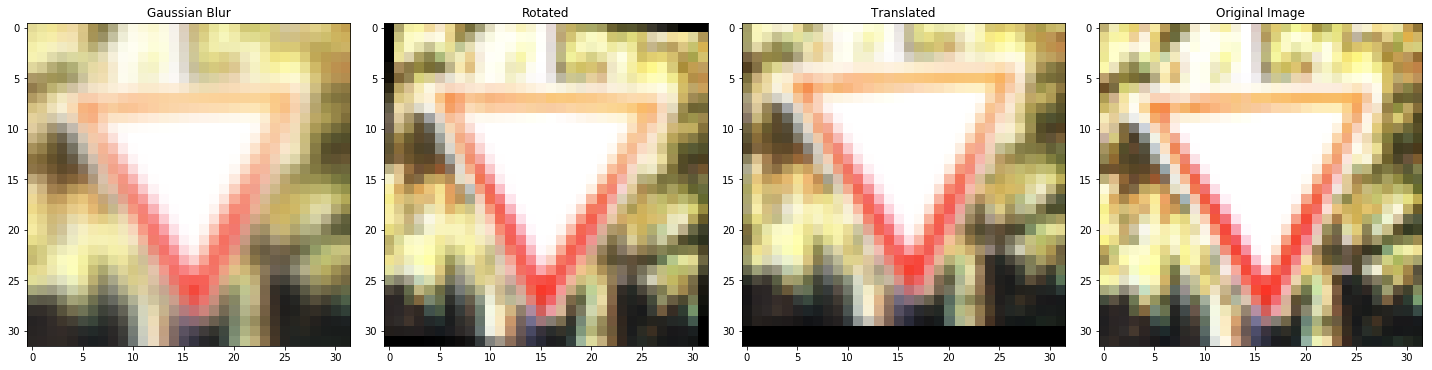

In [5]:
index          = random.randint(0, len(X_train))
image          = X_train[index]
translated_img = random_translation(image, x_max_trans = 1, y_max_trans = 2)
rotated_img    = random_rotation(image, base_angle = 15)
gaussian_blur  = gaussian_blur(image)

fig = plt.figure(figsize = (20,20))

plt.subplot(144)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(143)
plt.imshow(translated_img)
plt.title('Translated')
plt.subplot(142)
plt.imshow(rotated_img)
plt.title('Rotated')
plt.subplot(141)
plt.imshow(gaussian_blur)
plt.title('Gaussian Blur')
fig.tight_layout()


#### 2. Describe how, and identify where in your code, you set up training, validation and testing data. How much data was in each set? Explain what techniques were used to split the data into these sets. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, identify where in your code, and provide example images of the additional data)

The data split up was done in the first cell. After loading the image data set, I used the function **sklearn.model_selection.train_test_split** to split the data set in two, taking the 20% of the data for validation, and the rest for training. 

### Model Architecture

In [6]:
PADDING_SAME  = 'SAME'
PADDING_VALID = 'VALID'

def get_tensor(shape):
    # Returns a tensor with the given shape.
    return tf.Variable(tf.truncated_normal(shape, mean = 0, stddev = 0.1))

def get_zero_tensor(shape):
    # Returns a tensor filled with zeroes with the given shape.
    return tf.Variable(tf.zeros(shape))

def get_convolution2D(x, shape, stride, padding):
    # returns a 2D convolution
    w    = get_tensor(shape)
    b    = get_zero_tensor(shape[-1])
    conv = tf.nn.conv2d(x, w, strides=[1, stride, stride, 1], padding = padding)
    conv = tf.nn.bias_add(conv, b)
    return conv

def get_relu(x):
    # returns a relu activation.
    return tf.nn.relu(x)

def get_max_pooling(x, k, stride, padding):
    # returns a max pooling node.
    return tf.nn.max_pool(x, ksize = [1, k, k, 1], strides = [1, stride, stride, 1], padding = padding)

def get_average_pooling(x, k, stride, padding):
    return tf.nn.avg_pool(x, ksize = [1, k, k, 1], strides = [1, stride, stride, 1], padding = padding)

def get_dropout(x, probability):
    # returns a dropout node.
    return tf.nn.dropout(x, probability)

def get_fully_connected(x, shape):
    # returns a fully connected layer.
    w  = get_tensor(shape)
    b  = get_zero_tensor(shape[-1])
    fc = tf.matmul(x, w)
    fc = tf.nn.bias_add(fc, b)
    return fc

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def buildClassifier(x, n_classes, input_depth = 3):  
    # Builds the classifier.
    dropout_p = 0.1
    padding   = PADDING_VALID
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    layers = get_convolution2D(x, (5, 5, input_depth, 6), 1, padding)
    # Activation.
    layers = get_relu(layers)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    layers = get_average_pooling(layers, 2, 2, padding)
    # Dropout 
    #layers = get_dropout(layers, dropout_p)
    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    layers = get_convolution2D(layers, (5, 5, 6, 16), 1, padding)
    # Activation.
    layers = get_relu(layers)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    layers = get_average_pooling(layers, 2, 2, padding)
    # Dropout 
    #layers = get_dropout(layers, dropout_p)
    # Flatten. Input = 5x5x16. Output = 400.
    layers = flatten(layers)
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    layers = get_fully_connected(layers, shape=(400, 120))    
    # Activation.
    layers = get_relu(layers)
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    layers = get_fully_connected(layers, shape=(120, 84)) 
    # SOLUTION: Activation.
    layers = get_relu(layers)
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    layers = get_fully_connected(layers, shape=(84, n_classes)) 
    return layers

### Features and Labels

In [8]:
x         = tf.placeholder(tf.float32, (None, 32, 32, input_depth))
y         = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Training Pipeline

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [9]:
rate = 0.001

logits             = buildClassifier(x, n_classes, input_depth)
cross_entropy      = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation     = tf.reduce_mean(cross_entropy)
optimizer          = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver              = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples   = len(X_data)
    total_accuracy = 0
    sess           = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        accuracy         = sess.run(accuracy_operation, feed_dict = { x: batch_x, y: batch_y })
        total_accuracy  += (accuracy * len(batch_x))
        
    return total_accuracy / num_examples

### Model Training

In [11]:
EPOCHS     = 30
BATCH_SIZE = 128
SAMPLES    = 20

data_generator = generate_batch(X_train, y_train, SAMPLES, BATCH_SIZE)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train) * (SAMPLES + 1)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            #batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            batch_x, batch_y = next(data_generator)
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} - Accuracy = {:.3f}".format(i + 1, validation_accuracy))
        
    saver.save(sess, './traffic-sign-classifier')
    print("Model saved")

Training...

EPOCH 1 - Accuracy = 0.836
EPOCH 2 - Accuracy = 0.912
EPOCH 3 - Accuracy = 0.952
EPOCH 4 - Accuracy = 0.944
EPOCH 5 - Accuracy = 0.966
EPOCH 6 - Accuracy = 0.968
EPOCH 7 - Accuracy = 0.900
EPOCH 8 - Accuracy = 0.951
EPOCH 9 - Accuracy = 0.967
EPOCH 10 - Accuracy = 0.949
EPOCH 11 - Accuracy = 0.966
EPOCH 12 - Accuracy = 0.948
EPOCH 13 - Accuracy = 0.975
EPOCH 14 - Accuracy = 0.955
EPOCH 15 - Accuracy = 0.970
EPOCH 16 - Accuracy = 0.974
EPOCH 17 - Accuracy = 0.972
EPOCH 18 - Accuracy = 0.975
EPOCH 19 - Accuracy = 0.970
EPOCH 20 - Accuracy = 0.978
EPOCH 21 - Accuracy = 0.962
EPOCH 22 - Accuracy = 0.956
EPOCH 23 - Accuracy = 0.978
EPOCH 24 - Accuracy = 0.978
EPOCH 25 - Accuracy = 0.973
EPOCH 26 - Accuracy = 0.971
EPOCH 27 - Accuracy = 0.978
EPOCH 28 - Accuracy = 0.962
EPOCH 29 - Accuracy = 0.970
EPOCH 30 - Accuracy = 0.971
Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 